In [1]:
import uproot
# import ROOT
import matplotlib.pyplot as plt

In [22]:
# combine comamnd used to make the root file
"""
multipdf:
combine -M MultiDimFit -d combine_test_datacard.txt --points 70 --algo grid --setParameterRanges r=400,800 --cminDefaultMinimizerStrategy 0 --saveNLL -n Envelope -m 125 --setParameters myIndex=-1 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1

freezing multipdf with index=0
    combine -M MultiDimFit -d combine_test_datacard.txt --points 70 --algo grid --setParameterRanges r=400,800 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=0 -n fixed_pdf_X -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1
freezing multipdf with index=1
    combine -M MultiDimFit -d combine_test_datacard.txt --points 70 --algo grid --setParameterRanges r=400,800 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=1 -n fixed_pdf_X -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1
freezing multipdf with index=2
    combine -M MultiDimFit -d combine_test_datacard.txt --points 70 --algo grid --setParameterRanges r=400,800 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=2 -n fixed_pdf_X -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1

"""

'\nmultipdf\ncombine -M MultiDimFit -d combine_test_datacard.txt --points 100 --algo grid --setParameterRanges r=50,1500 --cminDefaultMinimizerStrategy 0 --saveNLL -n Envelope -m 125 --setParameters myIndex=-1 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1\n'

In [3]:
load_path = "./higgsCombineEnvelope.MultiDimFit.mH125.root"
file = uproot.open(load_path)

In [4]:
file.keys()
file['limit'].keys()
nll_arr = file['limit']['nll'].array()
r_arr = file['limit']['r'].array()

In [5]:
file['limit'].keys()

['limit',
 'limitErr',
 'mh',
 'syst',
 'iToy',
 'iSeed',
 'iChannel',
 't_cpu',
 't_real',
 'quantileExpected',
 'nll',
 'nll0',
 'r',
 'deltaNLL']

In [6]:
# file['limit']['nll'].array()
import numpy as np
nll = file['limit']['nll'].array()
nll0 = file['limit']['nll0'].array()
deltaNLL = file['limit']['deltaNLL'].array()
np.all(deltaNLL == (nll0/nll ))

False

In [7]:
nll0+nll

<Array [2.28e+05, 2.28e+05, ..., 2.28e+05, 2.28e+05] type='51 * float64'>

In [2]:
def getRandNLL(load_path: str):
    file = uproot.open(load_path)
    nll = file['limit']['nll'].array()
    nll0 = file['limit']['nll0'].array()
    deltaNLL = file['limit']['deltaNLL'].array()
    y_arr = 2*(deltaNLL + nll0 + nll)[1:]
    x_arr = file['limit']['r'].array()[1:]
    return x_arr, y_arr

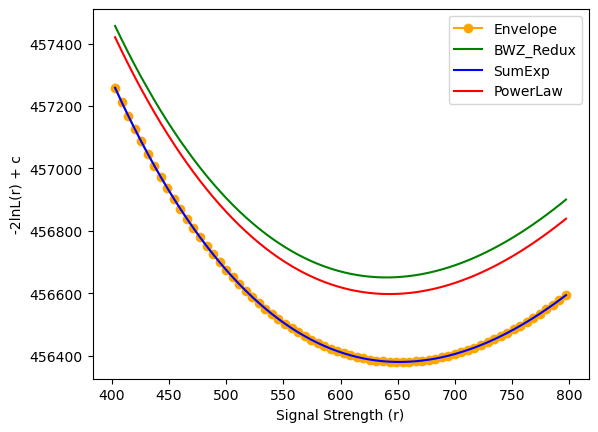

In [7]:
load_path_dict = {
    "Envelope": "./higgsCombineEnvelope.MultiDimFit.mH125.root",
    "BWZ_Redux": "./higgsCombinefixed_pdf_0.MultiDimFit.mH125.root",
    "SumExp": "./higgsCombinefixed_pdf_1.MultiDimFit.mH125.root",
    "PowerLaw": "./higgsCombinefixed_pdf_2.MultiDimFit.mH125.root",
}
color_map = {
    "BWZ_Redux": "Green",
    "SumExp": "Blue",
    "PowerLaw": "Red",
}
for process, load_path in load_path_dict.items():
    x_arr,y_arr = getRandNLL(load_path)
    if "Envelope" in load_path:
        plt.plot(x_arr,y_arr, color='orange', marker='o', label=process)
    else:
        plt.plot(x_arr,y_arr, color=color_map[process], label=process)
plt.legend()
plt.xlabel("Signal Strength (r)")
plt.ylabel("-2lnL(r) + c")
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
